## Load packages

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn import svm
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor

%matplotlib inline

## Load and Preprocess Data 

In [194]:
data=r'C:\Users\joogl\InsuranceClaimPredictions_Data\train_set.csv'
df = pd.read_csv(data, nrows=100000)
df.head(10)

,Row_ID,Household_ID,Vehicle,Calendar_Year,Model_Year,Blind_Make,Blind_Model,Blind_Submodel,Cat1,Cat2,...,Var5,Var6,Var7,Var8,NVCat,NVVar1,NVVar2,NVVar3,NVVar4,Claim_Amount
0,1,1,3,2005,2005,K,K.78,K.78.2,D,C,...,1.008912,0.261040,0.907793,-0.077998,M,-0.231530,-0.266117,-0.272337,-0.251419,0.0
1,2,2,2,2005,2003,Q,Q.22,Q.22.3,B,C,...,1.240851,0.432987,-0.726459,0.204785,O,-0.231530,-0.266117,-0.272337,-0.251419,0.0
2,3,3,1,2005,1998,AR,AR.41,AR.41.1,B,?,...,-0.971487,-1.405797,-0.837048,-1.176858,F,-0.231530,-0.266117,-0.272337,-0.251419,0.0
3,4,3,1,2006,1998,AR,AR.41,AR.41.1,B,?,...,-0.971487,-1.405797,-0.837048,-1.176858,F,-0.231530,-0.266117,-0.272337,-0.251419,0.0
4,5,3,2,2005,2001,D,D.20,D.20.0,J,C,...,0.812656,2.112691,1.534462,2.347260,F,-0.231530,-0.266117,-0.272337,-0.251419,0.0
5,6,3,2,2006,2001,D,D.20,D.20.0,J,C,...,0.812656,2.112691,1.534462,2.347260,F,-0.231530,-0.266117,-0.272337,-0.251419,0.0
6,7,4,1,2006,2001,AJ,AJ.129,AJ.129.3,G,C,...,0.580718,0.551128,0.416289,-0.024395,M,-0.231530,-0.266117,-0.272337,-0.251419,0.0
7,8,4,2,2006,2002,AQ,AQ.17,AQ.17.1,B,C,...,0.527193,-0.023200,-0.701884,0.226664,M,-0.231530,-0.266117,-0.272337,-0.251419,0.0
8,9,4,3,2005,2002,AQ,AQ.17,AQ.17.1,B,C,...,0.527193,-0.023200,-0.701884,0.226664,M,-0.231530,-0.266117,-0.272337,-0.251419,0.0
9,10,5,1,2005,1995,BW,BW.3,BW.3.0,D,?,...,0.176312,0.283264,0.969232,-0.792339,N,2.054683,-0.266117,-0.272337,-0.251419,0.0


In [195]:
print('Claim amount: min: {}, max: {}, mean: {}, sd: {}'.format(
    round(df['Claim_Amount'].min(), 2),
    round(df['Claim_Amount'].max(), 2),
    round(df['Claim_Amount'].mean(), 2),
    round(df['Claim_Amount'].std(), 2)
))

Claim amount: min: 0.0, max: 2920.52, mean: 0.86, sd: 22.98


In [196]:
# dummy code claims
df['claim'] = df.Claim_Amount.apply(lambda x: 0 if x == 0 else 1)
df['Model_Year'] = df['Model_Year'] - np.min(df['Model_Year'])
df['Model_Year'] = df['Model_Year'].astype('float64')
df.head()

,Row_ID,Household_ID,Vehicle,Calendar_Year,Model_Year,Blind_Make,Blind_Model,Blind_Submodel,Cat1,Cat2,...,Var6,Var7,Var8,NVCat,NVVar1,NVVar2,NVVar3,NVVar4,Claim_Amount,claim
0,1,1,3,2005,24.0,K,K.78,K.78.2,D,C,...,0.261040,0.907793,-0.077998,M,-0.23153,-0.266117,-0.272337,-0.251419,0.0,0
1,2,2,2,2005,22.0,Q,Q.22,Q.22.3,B,C,...,0.432987,-0.726459,0.204785,O,-0.23153,-0.266117,-0.272337,-0.251419,0.0,0
2,3,3,1,2005,17.0,AR,AR.41,AR.41.1,B,?,...,-1.405797,-0.837048,-1.176858,F,-0.23153,-0.266117,-0.272337,-0.251419,0.0,0
3,4,3,1,2006,17.0,AR,AR.41,AR.41.1,B,?,...,-1.405797,-0.837048,-1.176858,F,-0.23153,-0.266117,-0.272337,-0.251419,0.0,0
4,5,3,2,2005,20.0,D,D.20,D.20.0,J,C,...,2.112691,1.534462,2.347260,F,-0.23153,-0.266117,-0.272337,-0.251419,0.0,0


In [197]:
######################
####### TEST #########
######################

################
### RESAMPLE ###
################

### df['weight'] = df.claim.apply(lambda x: 0.05 if x == 0 else 0.95)

# Need to equalize proportion of claim=1 to claim=0
# drop some observations where claim=0

### df = df.sample(frac=0.25, weights=df.weight, replace=False)

In [198]:
# separate feature matrix from labels (claims in {0 = No claim, 1 = Claim})
# only continuous variables are included in the model
X = df[['Var5', 'Var6', 'Var7', 'Var8', 'NVVar1', 'NVVar2', 'NVVar3', 'NVVar4', 'Vehicle', 'Model_Year', 'Blind_Submodel']]
y = df[['claim', 'Claim_Amount']].values

[[0. 0.]
 [0. 0.]
 [0. 0.]
 ...
 [0. 0.]
 [0. 0.]
 [0. 0.]]
99381
619


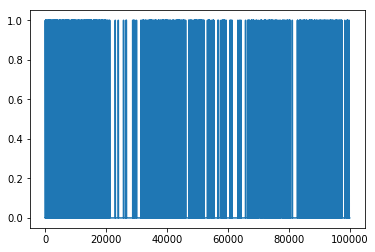

In [199]:
######################
####### TEST #########
######################

print(y[:,0:2].copy())

plt.clf()
plt.plot(y[:,0].copy())

y_zeros = y[y[:,0] == 0]
y_nonzeros = y[y[:,0] != 0]

print(len(y_zeros))
print(len(y_nonzeros))

#----------------------------#
# print(y.iloc[:,0:2].copy())

# plt.clf()
# plt.hist(y.iloc[:,1].copy())

In [200]:
# split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

[[0. 0.]
 [0. 0.]
 [0. 0.]
 ...
 [0. 0.]
 [0. 0.]
 [0. 0.]]
74547
453


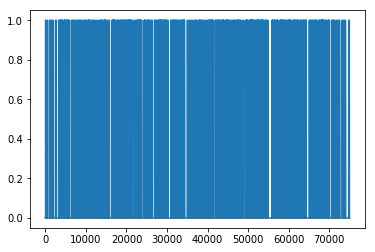

In [201]:
######################
####### TEST #########
######################

print(y_train[:,0:2].copy())

plt.clf()
plt.plot(y_train[:,0].copy())

y_train_zeros = y_train[y_train[:,0] == 0]
y_train_nonzeros = y_train[y_train[:,0] != 0]

print(len(y_train_zeros))
print(len(y_train_nonzeros))


In [202]:
def pipeline(X):
    df_cont = pd.DataFrame()
    df_cat = pd.DataFrame()
    for x in X:
        if X[x].dtypes == 'float64':
            df_cont['{}'.format(x)] = X[x]
        else:
            df_cat['{}'.format(x)] = X[x]
    
    dummy = OneHotEncoder()
    dummyC = LabelEncoder()
    
    df_cat2 = np.zeros((df_cat.shape[0], 1))
    for x in df_cat:
        y = dummyC.fit_transform(df_cat[x].reshape(-1, 1))
        y = dummy.fit_transform(y.reshape(-1, 1)).toarray()
        y = pd.DataFrame(y[:, 1:])
        df_cat2 = np.hstack((df_cat2, y))
    df_cat = pd.DataFrame(df_cat2)
    
    pca = PCA(n_components=10)
    pca.fit_transform(df_cat)
    k = np.argmax(np.cumsum(pca.explained_variance_ratio_) > 0.95) + 1
    pca = PCA(n_components=k)
    df_cat_pca = pca.fit_transform(df_cat)
    df_cat = pd.DataFrame(df_cat_pca)
    
    return df_cont, df_cat

X_train_cont, X_train_cat = pipeline(X_train)
X_test_cont, X_test_cat = pipeline(X_test)

C:\Users\joogl\Anaconda3\envs\ipykernel_py363\lib\site-packages\ipykernel_launcher.py:15: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  from ipykernel import kernelapp as app
C:\Users\joogl\Anaconda3\envs\ipykernel_py363\lib\site-packages\sklearn\preprocessing\label.py:111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [203]:
# scale features to have same variance
sc = StandardScaler()
X_train_cont = sc.fit_transform(X_train_cont)
X_test_cont = sc.transform(X_test_cont)

## Layer 1 - classify claim or no claim using a logistic regression

In [204]:
#####################
### MODEL Layer 1 ###
#####################

# fit svm model
# model = svm.SVC()
# model.fit(X_train_cont, y_train[:,0])

# fit logistic regression model
model = LogisticRegression(class_weight = 'balanced')    # failing to specify class_weight = 'balanced' leads to all 0 estimates
model.fit(X_train_cont, y_train[:,0])

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [205]:
# get in and out of sample accuracy
y_pred = model.predict(X_train_cont)
in_acc = accuracy_score(y_pred, y_train[:,0])
y_pred = model.predict(X_test_cont)
out_acc = accuracy_score(y_pred, y_test[:,0])
print('In-sample accuracy: {}\nOut-of-sample accuracy: {}'.format(in_acc, out_acc))

In-sample accuracy: 0.6694666666666667
Out-of-sample accuracy: 0.6704


[[0. 0.]
 [0. 0.]
 [0. 0.]
 ...
 [0. 0.]
 [0. 0.]
 [0. 0.]]
24834
166


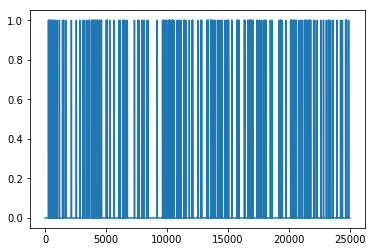

In [206]:
######################
####### TEST #########
######################

print(y_test[:,0:2].copy())

plt.clf()
plt.plot(y_test[:,0].copy())

y_test_zeros = y_test[y_test[:,0] == 0]
y_test_nonzeros = y_test[y_test[:,0] != 0]

print(len(y_test_zeros))
print(len(y_test_nonzeros))

[1. 1. 0. ... 0. 1. 0.]
16796
8204


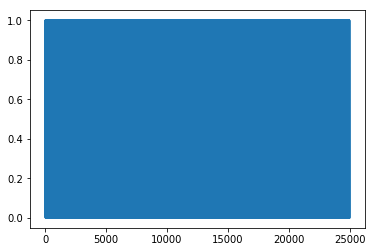

In [207]:
######################
####### TEST #########
######################

print(y_pred.copy())

plt.clf()
plt.plot(y_pred.copy())

y_pred_zeros = y_pred[y_pred == 0]
y_pred_nonzeros = y_pred[y_pred != 0]

print(len(y_pred_zeros))
print(len(y_pred_nonzeros))

In [208]:
######################
####### TEST #########
######################

print(X_test_cont)

print(len(y_pred[y_pred[:] == 0]))
print(len(y_pred[y_pred[:] == 1]))

[[ 0.443571   -0.33823781 -0.69153134 ... -0.25045126 -0.27350284
   0.46216557]
 [ 2.00672618  1.70136961  1.70148394 ... -0.25045126 -0.27350284
   0.64945103]
 [-0.69598104 -1.16874389 -1.21652961 ... -0.25045126 -0.27350284
   0.46216557]
 ...
 [ 1.88740143  1.86001915  1.67706544 ... -0.25045126 -0.27350284
   1.21130739]
 [ 0.29441496 -0.31660377 -0.9601351  ... -0.25045126 -0.27350284
  -0.47426171]
 [-0.40363526  0.04516517 -0.89908876 ... -0.25045126 -0.27350284
  -1.03611808]]
16796
8204


## Layer 2 - predict claim value using a OLS multiple regression

In [209]:
X_train_layer2 = pd.concat([X_train_cat, pd.DataFrame(X_train_cont)], axis=1)
X_train_layer2.head()

,0,0,1,2,3,4,5,6,7,8
0,-0.243031,-0.284310,-0.794956,-0.960135,-0.240450,-0.241578,-0.250954,-0.250451,-0.273503,-1.036118
1,-0.244402,-0.898833,-1.251674,-0.911298,-0.767011,-0.241578,-0.250954,-0.250451,-0.273503,0.274880
2,-0.244075,-0.242547,-0.727650,-0.923507,-0.335940,-0.241578,-0.250954,-0.250451,-0.273503,-0.474262
3,-0.243371,-0.129188,-0.581020,-0.825833,-0.393234,-0.241578,-0.250954,-0.250451,-0.273503,0.649451
4,0.715685,-1.811668,-0.935577,-1.509552,1.285262,5.841606,-0.250954,-0.250451,-0.273503,0.462166


In [210]:
X_test_layer2 = pd.concat([X_test_cat, pd.DataFrame(X_test_cont)], axis=1)
X_test_layer2.head()

,0,0,1,2,3,4,5,6,7,8
0,-0.235519,0.443571,-0.338238,-0.691531,-0.134639,-0.241578,-0.250954,-0.250451,-0.273503,0.462166
1,-0.232630,2.006726,1.701370,1.701484,1.130460,-0.241578,2.466872,-0.250451,-0.273503,0.649451
2,-0.233142,-0.695981,-1.168744,-1.216530,-0.809596,-0.241578,-0.250954,-0.250451,-0.273503,0.462166
3,-0.231103,2.084287,1.239844,1.335206,0.752413,-0.241578,-0.250954,-0.250451,-0.273503,-0.099691
4,-0.291486,-0.505061,-0.656739,-0.654903,0.123956,-0.241578,-0.250954,-0.250451,-0.273503,0.274880


In [211]:
X_train_claims = X_train_layer2[y_train[:,0] == 1]    # col. 0 is claim. col. 1 is claim amount
y_train_claims = y_train[y_train[:,1] != 0, 1]        # filter out all claim amounts that are 0 or 1
y_train_claims = np.log(1 + y_train_claims)

X_test_claims = X_test_layer2[y_test[:,0] == 1]       # col. 0 is claim. col. 1 is claim amount
y_test_claims = y_test[y_test[:,1] != 0, 1]           # filter out all claim amounts that are 0 or 1
y_test_claims = np.log(1 + y_test_claims)

(array([12., 34., 59., 83., 84., 63., 53., 44., 16.,  5.]),
 array([0.21583112, 0.99223397, 1.76863683, 2.54503968, 3.32144253,
        4.09784539, 4.87424824, 5.65065109, 6.42705394, 7.2034568 ,
        7.97985965]),
 <a list of 10 Patch objects>)

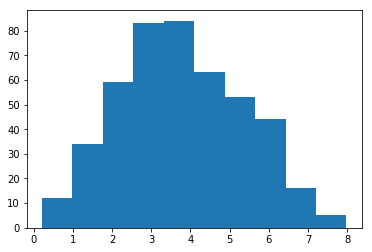

In [212]:
plt.hist(y_train_claims)

In [213]:
#####################
### MODEL Layer 2 ###
#####################

# regr = RandomForestRegressor(max_depth=8, random_state=42)
# regr.fit(X_train_claims, y_train_claims)

regr = KNeighborsRegressor(n_neighbors=2)
regr.fit(X_train_claims, y_train_claims)

# regr = LinearRegression()
# regr.fit(X_train_claims, y_train_claims)

# get in and out of sample accuracy
y_pred = regr.predict(X_train_claims)
in_acc = np.sqrt(mean_squared_error(y_pred, y_train_claims))
y_pred = regr.predict(X_test_claims)
out_acc = np.sqrt(mean_squared_error(y_pred, y_test_claims))
print('In-sample accuracy: {}\nOut-of-sample accuracy: {}'.format(in_acc, out_acc))

In-sample accuracy: 1.0782778287566506
Out-of-sample accuracy: 1.8880041368711404


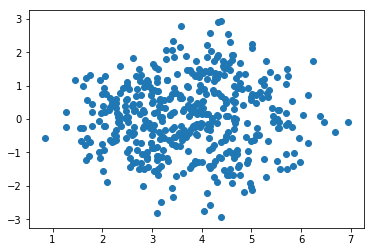

In [214]:
plt.scatter(x=regr.predict(X_train_claims), y=y_train_claims - regr.predict(X_train_claims))

## Join layers 1 and 2 for final predictions

In [215]:
def join_predict(X, model1, model2):
    
    print('loading data...')
    X_cont, X_cat = pipeline(X)
    X_cont = sc.transform(X_cont)    
    df = pd.concat([pd.DataFrame(X_cont), pd.DataFrame(X_cat)], axis=1)
    
    print('clasifying (layer1)...')
    layer1 = model1.predict(X_cont)
    
    print('regressing (layer2)...')
    layer2 = []
    
    for x in layer1:
        if x == 1:
            layer2.append(model2.predict(df))
        else:
            layer2.append(0)
    
    print('Number of 0 predictions: {}'.format(len(layer1[layer1[:] == 0])))
    print('Number of 1 predictions: {}'.format(len(layer1[layer1[:] == 1])))
    return layer2

In [ ]:
######################
####### TEST #########
######################

print(X_train_cont)
#print(X_train_cont) 
#print(X_train_cat)

#----------------------------------------------------------------------#
X_cont_t, X_cat_t = pipeline(X_train)
#X_cont_t = sc.transform(X_cont_t)    
df_t = pd.concat([pd.DataFrame(X_cont_t), pd.DataFrame(X_cat_t)], axis=1)

print('clasifying (layer1)...')
layer1 = model.predict(X_train_cont)

print('regressing (layer2)...')
layer2 = []

i = 0
for x in layer1:
    # print(x)
    if x == 1:
        i += 1
print(i)

#----------------------------------#
print(layer1)
print(layer1[:] == 0)
print(len(layer1[layer1[:] == 0]))
print(len(layer1[layer1[:] == 1]))

print("============================================")
print(X_cont_t)
print(layer1)

[[-0.28431041 -0.79495606 -0.9601351  ... -0.25045126 -0.27350284
  -1.03611808]
 [-0.89883326 -1.2516743  -0.91129801 ... -0.25045126 -0.27350284
   0.27488011]
 [-0.24254672 -0.72765018 -0.92350725 ... -0.25045126 -0.27350284
  -0.47426171]
 ...
 [-0.68404855  0.29515828  0.57823189 ... -0.25045126 -0.27350284
   0.64945103]
 [ 1.88740143  0.78432758  1.20090416 ... -0.25045126  1.1294769
  -0.0996908 ]
 [-1.97872293 -0.82981087 -1.47292403 ... -0.25045126 -0.27350284
   0.27488011]]


C:\Users\joogl\Anaconda3\envs\ipykernel_py363\lib\site-packages\ipykernel_launcher.py:15: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  from ipykernel import kernelapp as app
C:\Users\joogl\Anaconda3\envs\ipykernel_py363\lib\site-packages\sklearn\preprocessing\label.py:111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


clasifying (layer1)...
regressing (layer2)...
24741
[0. 0. 0. ... 0. 1. 0.]
[ True  True  True ...  True False  True]
50259
24741
           Var5      Var6      Var7      Var8    NVVar1    NVVar2    NVVar3  \
98980 -0.198358 -0.770645 -0.935349 -0.319977 -0.231530 -0.266117 -0.272337   
69824 -0.810914 -1.215135 -0.886198 -0.805575 -0.231530 -0.266117 -0.272337   
9928  -0.156728 -0.705141 -0.898486 -0.408039 -0.231530 -0.266117 -0.272337   
75599 -0.043732 -0.562436 -0.800185 -0.460876 -0.231530 -0.266117 -0.272337   
95621 -1.720827 -0.907501 -1.488291  1.087045  6.627110 -0.266117 -0.272337   
80724  0.051422 -0.548400 -1.058225 -0.459782 -0.231530 -0.266117 -0.272337   
78925 -0.858491 -0.455993 -1.082800  0.997342 -0.231530 -0.266117 -0.272337   
14672 -0.965540 -1.004587 -1.439141 -0.918689 -0.231530 -0.266117 -0.272337   
76016  0.878075  0.604935  0.907793  0.049993 -0.231530 -0.266117 -0.272337   
95628  0.806709  0.698511  0.821780  0.158293 -0.231530 -0.266117 -0.272337   
7

In [ ]:
y_pred_train = join_predict(X_train, model, regr)

loading data...


C:\Users\joogl\Anaconda3\envs\ipykernel_py363\lib\site-packages\ipykernel_launcher.py:15: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  from ipykernel import kernelapp as app
C:\Users\joogl\Anaconda3\envs\ipykernel_py363\lib\site-packages\sklearn\preprocessing\label.py:111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


clasifying (layer1)...
regressing (layer2)...


In [ ]:
acc = np.sqrt(mean_squared_error(y_pred_train, np.log(1 + y_train[:, 1])))
print('Final model accuracy on train set (in log):', acc)
print('Error for a $100 prediction: +/-  US$', round(np.expm1(np.log(100) + acc), 2))
print('Error for a $1000 prediction: +/-  US$', round(np.expm1(np.log(1000) + acc), 2))

In [ ]:
y_pred_test = join_predict(X_test, model, regr)

In [ ]:
acc = np.sqrt(mean_squared_error(y_pred_test, np.log(1 + y_test[:, 1])))
print('Final model accuracy on test set (in log):', acc)
print('Error for a $100 prediction: +/-  US$', round(np.expm1(np.log(100) + acc), 2))
print('Error for a $1000 prediction: +/-  US$', round(np.expm1(np.log(1000) + acc), 2))